In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tcn.tcn import TCN
from tensorflow import keras

In [2]:
window_size = 10   # window size
batch_size = 32    # batch size
epochs = 100       # epoch
filter_nums = 10   # filter number
kernel_size = 4    # kernel size
data_PATH = '../data/IT Companies/AAPL.csv'

In [3]:

def get_dataset():
    df = pd.read_csv(data_PATH)
    open_arr = df['Adj Close']
    X = np.zeros(shape=(len(open_arr) - window_size, window_size))
    label = np.zeros(shape=(len(open_arr) - window_size))
    for i in range(len(open_arr) - window_size):
        X[i, :] = open_arr[i:i+window_size]
        label[i] = open_arr[i+window_size]
    train_X = X[:int(len(X)*0.8), :]
    train_label = label[:int(len(X)*0.8)]
    test_X = X[int(len(X)*0.8):len(X), :]
    test_label = label[int(len(X)*0.8):len(X)]

    # test_X = X[int(len(X)*0.8):int(len(X)*0.8)+1, :]
    # test_label = label[int(len(X)*0.8):int(len(X)*0.8)+1]
    # train_X = X[:-2, :]
    # train_label = label[:-2]
    # test_X = X[-2:-1, :]
    # test_label = label[-2:-1]
    return train_X, train_label, test_X, test_label
 

def RMSE(pred, true):
    return np.sqrt(np.mean(np.square(pred - true)))
 
def MAPE(pred, true):
    return np.mean(np.abs(pred - true)/np.abs(true))

def plot(pred, true):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(range(len(pred)), pred, label='label')
    ax.plot(range(len(true)), true, label='prediction')
    ax.legend()
    plt.show()
 
 


In [4]:
train_X, train_label, test_X, test_label = get_dataset()

model = keras.models.Sequential([
    keras.layers.Input(shape=(window_size, 1)),
    TCN(nb_filters=filter_nums,                   # 滤波器的个数，类比于units
        kernel_size=kernel_size,                  # 卷积核的大小
        dilations=[1, 2, 4, 8]),                  # 空洞因子
    keras.layers.Dense(units=1, activation='relu')
])

model.summary()
model.compile(optimizer='adam', loss='mae', metrics=['mae'])
model.fit(train_X, train_label, validation_split=0.2, epochs=epochs)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
tcn (TCN)                    (None, 10)                2940      
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 2,951
Trainable params: 2,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
174/174 [==============================] - 1s 5ms/step - loss: 0.8573 - mae: 0.8573 - val_loss: 13.0965 - val_mae: 13.0965
Epoch 2/100
174/174 [==============================] - 1s 4ms/step - loss: 0.8573 - mae: 0.8573 - val_loss: 13.0965 - val_mae: 13.0965
Epoch 3/100
174/174 [==============================] - 1s 4ms/step - loss: 0.8573 - mae: 0.8573 - val_loss: 13.0965 - val_mae: 13.0965
Epoch 4/100
174/174 [==============================] - 1s 4ms/step - loss: 0.8573 - mae: 0.8573 - val_loss: 13.

55/55 [==============================] - 0s 1ms/step - loss: 1.0140 - mae: 1.0140
RMSE  1.577840751241124
MAPE  0.017569502376263358


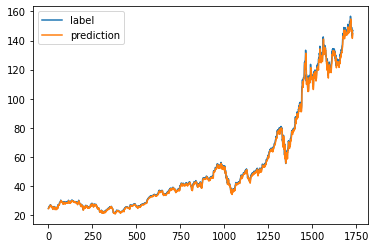

In [ ]:
model.evaluate(test_X, test_label)
prediction = model.predict(test_X).reshape(-1)

print('RMSE ', RMSE(prediction,test_label))
print('MAPE ', MAPE(prediction,test_label))

plot(test_label, prediction)


In [ ]:
test_label
prediction

array([ 24.420362,  24.387346,  24.593098, ..., 141.73149 , 143.618   ,
       144.67894 ], dtype=float32)

In [ ]:
def plot2():
    dataset = pd.read_csv(data_PATH)
    dataset.set_index('Date', inplace=True)
    
    date = dataset.index
    dataset = dataset['Open'].values.reshape(-1, 1).reshape(-1)

    testPredictPlot = np.empty_like(dataset)
    testPredictPlot[:] = np.nan
    testPredictPlot[int(len(dataset)*0.8)+1: len(dataset)-1] = prediction

    df = pd.DataFrame({'label': dataset, 'prediction': testPredictPlot}, index = date)
    df.plot(rot=30)

    plt.ylabel('price')
    plt.xlabel('date')
    plt.show()

plot2()

ValueError: could not broadcast input array from shape (1731) into shape (1749)